<div style="background-color: #ddefdd; padding: 40px; border-radius: 10px; color: #007d3c; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 48px; font-weight: bold;">🏦 CREDIT RISK PREDICTION NOTEBOOK </h1>
    <p style="font-size: 24px; font-weight: bold; margin-top: 20px;"></p>
    <img src="http://media2.giphy.com/media/3o6MbqeA01e9HsNV8k/giphy.gif" alt="GIF" style="width: 400px; margin: 20px auto;">
</div>


 
 <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

<!-- Bank Money Theme -->
<div style="border-radius: 0px; border: 2px solid #3eb489; padding: 15px; background-color: #ddefdd; font-size: 120%; text-align: center; color: #007d3c; font-weight: bold;">
   Table of Contents
</div>


* [1. 💾 Import Libraries](#1.-Import-Libraries) 

* [2. 📑 Read and Explain Dataset](#2.-Read-and-Explain-Dataset)

* [3. 📊 Exploratory Data Analysis](#3.-Exploratory-Data-Analysis) 

* [4. 🎯 Dealing with Outliers](#4.-Dealing-with-Outliers)

* [5. 💡 Feature Engineering](#5.-Feature-Engineering)


## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">1. Import Libraries</div>

In [324]:
# data
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os
import warnings
warnings.filterwarnings("ignore")



## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">2. Read and Explain Dataset</div>

In [327]:
#Read data
data = pd.read_csv("credit_risk_dataset.csv")

# Print sample
data.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': '#daefdd','color': 'black','border-color': '#8b8c8c'})

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,30,75000,MORTGAGE,11.000000,PERSONAL,B,5000,nan,0,0.070000,N,10
1,25,66000,RENT,6.000000,HOMEIMPROVEMENT,B,16000,10.000000,0,0.240000,N,4
2,30,100000,MORTGAGE,11.000000,EDUCATION,A,12800,6.920000,0,0.130000,N,8
3,22,57175,RENT,6.000000,EDUCATION,F,16000,17.150000,1,0.280000,Y,2
4,22,75000,MORTGAGE,6.000000,DEBTCONSOLIDATION,A,18000,5.790000,0,0.240000,N,2
5,22,44700,RENT,0.000000,EDUCATION,C,4000,13.990000,0,0.090000,N,3


<div style="background-color: #ddefdd; padding: 10px; border-radius: 10px; color: #007d3c; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">Feature Descriptions</h1>
</div>

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
    <ul>
        <li><b>person_age:</b> Age of the individual applying for the loan.</li>
        <li><b>person_income:</b> Annual income of the individual.</li>
        <li><b>person_home_ownership:</b> Type of home ownership of the individual.
            <ul>
                <li>rent: The individual is currently renting a property.</li>
                <li>mortgage: The individual has a mortgage on the property they own.</li>
                <li>own: The individual owns their home outright.</li>
                <li>other: Other categories of home ownership that may be specific to the dataset.</li>
            </ul>
        </li>
        <li><b>person_emp_length:</b> Employment length of the individual in years.</li>
        <li><b>loan_intent:</b> The intent behind the loan application.</li>
        <li><b>loan_grade:</b> The grade assigned to the loan based on the creditworthiness of the borrower.
            <ul>
                <li>A: The borrower has a high creditworthiness, indicating low risk.</li>
                <li>B: The borrower is relatively low-risk, but not as creditworthy as Grade A.</li>
                <li>C: The borrower's creditworthiness is moderate.</li>
                <li>D: The borrower is considered to have higher risk compared to previous grades.</li>
                <li>E: The borrower's creditworthiness is lower, indicating a higher risk.</li>
                <li>F: The borrower poses a significant credit risk.</li>
                <li>G: The borrower's creditworthiness is the lowest, signifying the highest risk.</li>
            </ul>
        </li>
        <li><b>loan_amnt:</b> The loan amount requested by the individual.</li>
        <li><b>loan_int_rate:</b> The interest rate associated with the loan.</li>
        <li><b>loan_status:</b> Loan status, where 0 indicates non-default and 1 indicates default.
            <ul>
                <li>0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.</li>
                <li>1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.</li>
            </ul>
        </li>
        <li><b>loan_percent_income:</b> The percentage of income represented by the loan amount.</li>
        <li><b>cb_person_default_on_file:</b> Historical default of the individual as per credit bureau records.
            <ul>
                <li>Y: The individual has a history of defaults on their credit file.</li>
                <li>N: The individual does not have any history of defaults.</li>
            </ul>
        </li>
        <li><b>cb_preson_cred_hist_length:</b> The length of credit history for the individual.</li>
    </ul>
</div>


## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">3. Exploratory Data Analysis</div>

In [152]:
data.shape

(32581, 12)

In [154]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [156]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [158]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [162]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [164]:
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [166]:
data.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [168]:
data.duplicated().sum()

165

In [170]:
data.select_dtypes(exclude = ["object"]).corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


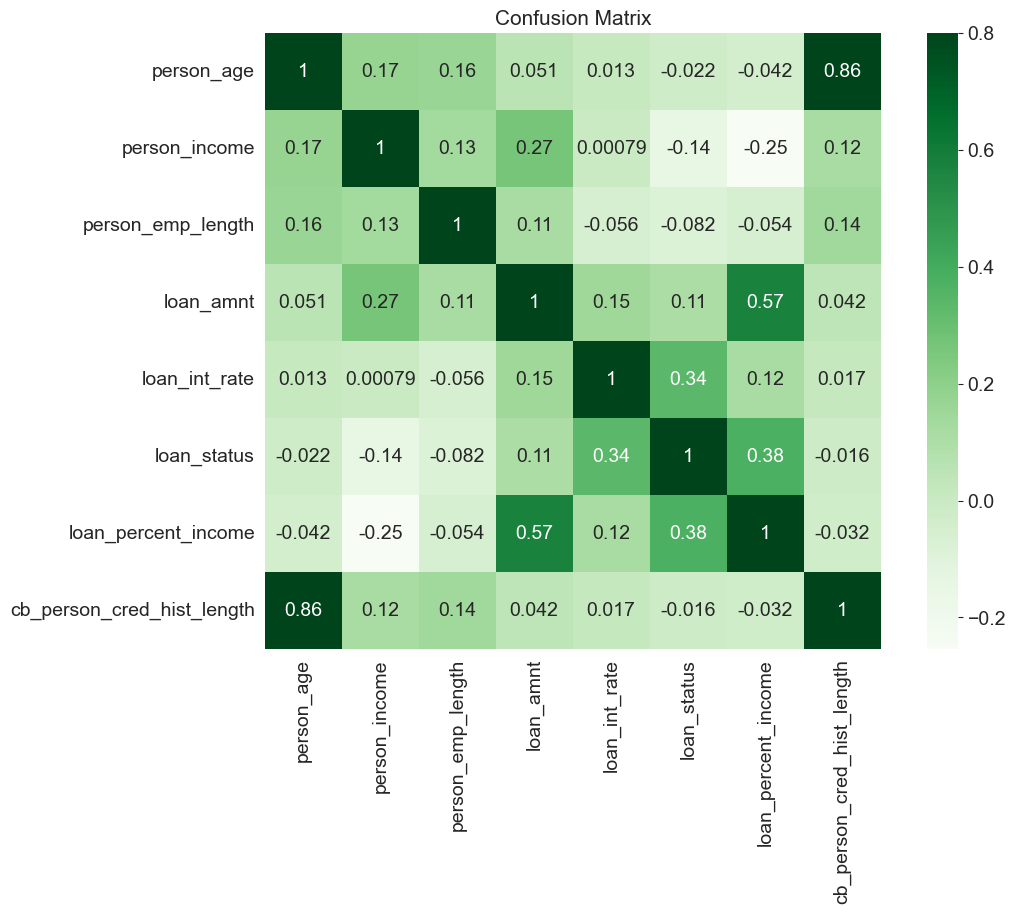

In [172]:
plt.figure(figsize = (12,8))
sns.heatmap(data.select_dtypes(exclude = ["object"]).corr(), vmax =.8, square = True, annot = True,cmap='Greens' )
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [173]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:#ddefdd;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')
    

In [174]:
nunique_df={var:pd.DataFrame(data[var].value_counts())
           for var in {'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'}}

multi_table([nunique_df['person_age'],nunique_df['person_income'],nunique_df['person_home_ownership'],nunique_df['person_emp_length'],nunique_df['loan_intent'],nunique_df['loan_grade'],nunique_df['loan_amnt'],nunique_df['loan_int_rate'],nunique_df['loan_status'],nunique_df['loan_percent_income'],nunique_df['cb_person_default_on_file'],nunique_df['cb_person_cred_hist_length']])

,count
person_age,
23,3889
22,3633
24,3549
25,3037
26,2477
27,2138
28,1854
29,1687
30,1316


## Univarient Analysis

In [176]:
#MAX AND MIN AGE
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')
        
age_group([0 ,18, 26, 36, 46, 56, 66])

 


maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 17829
Age between 27 and 36: Number of people 11834
Age between 37 and 46: Number of people 2360
Age between 47 and 56: Number of people 434
Age between 57 and 66: Number of people 98


In [177]:
#max and min income
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])


maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 2469
Income between 25001 and 50000: Number of people 11613
Income between 50001 and 75000: Number of people 9622
Income between 75001 and 100000: Number of people 4670
Income between 100001 and inf: Number of people 4207


In [178]:
#min and max loan amount
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])


maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 9489
Loan Amount between 5001 and 10000: Number of people 12040
Loan Amount between 10001 and 15000: Number of people 6123
Loan Amount between 15001 and inf: Number of people 4929


In [179]:
level_counts=data.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'person_home_ownership'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

**Observations: Most of the People taking a loan doesnt own their own house**


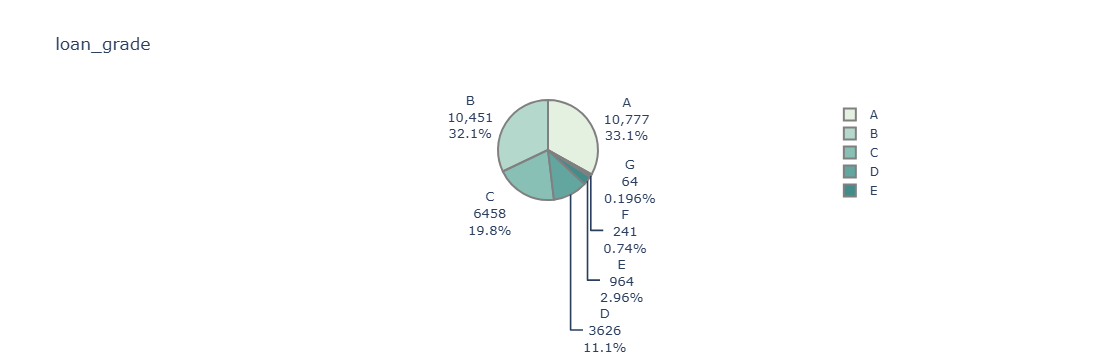

In [186]:
level_counts=data.loan_grade.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'loan_grade'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

**Observations: Loan Grade A and B comprises of 65.2% of total**

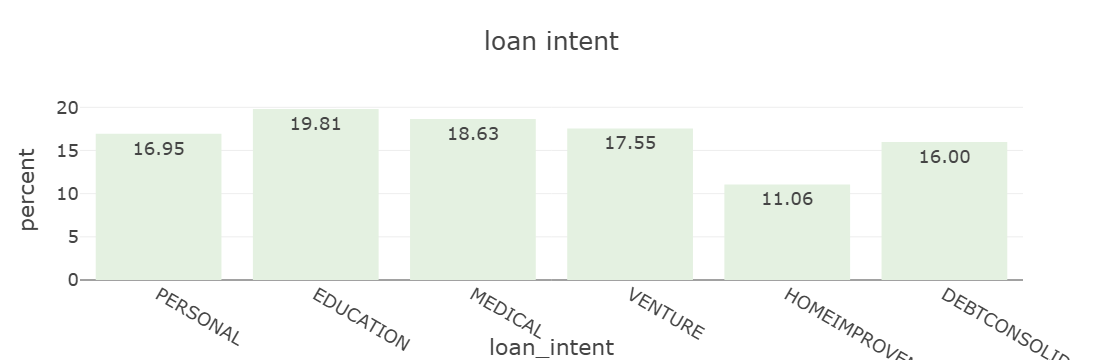

In [190]:
fig=px.histogram(data, x = 'loan_intent',histnorm = 'percent', text_auto = '.2f',template = 'presentation', title = 'loan intent',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

**Observations:Loan Intent are equally almost distributed**

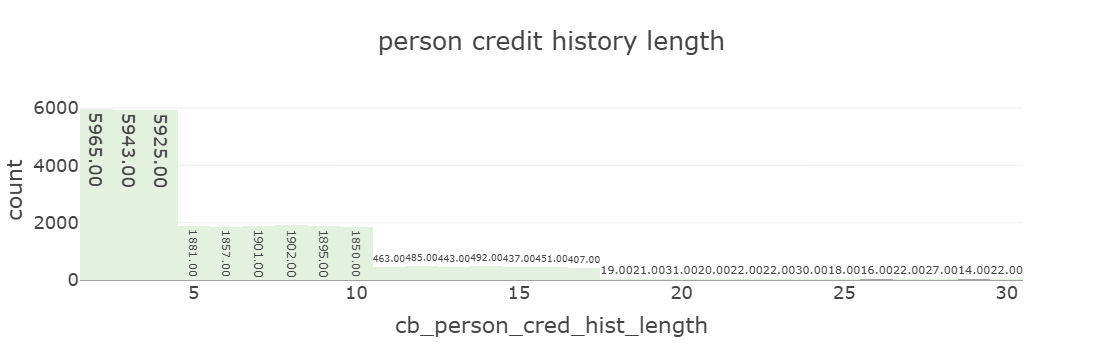

In [193]:
fig=px.histogram(data, x = 'cb_person_cred_hist_length', text_auto = '.2f',template = 'presentation', title = 'person credit history length',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

In [195]:
sns.pairplot(data,hue="loan_status")

# <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">4. Dealing with Outliers</div>

In [198]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [199]:
# drop values that are null
data.dropna(axis=0,inplace=True)

In [200]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [201]:
data['loan_status'].value_counts()

loan_status
0    22435
1     6203
Name: count, dtype: int64

In [202]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [203]:
#person_age max 144 (issue)
#person_emp_length max 123 (issue)
data.reset_index(inplace = True)

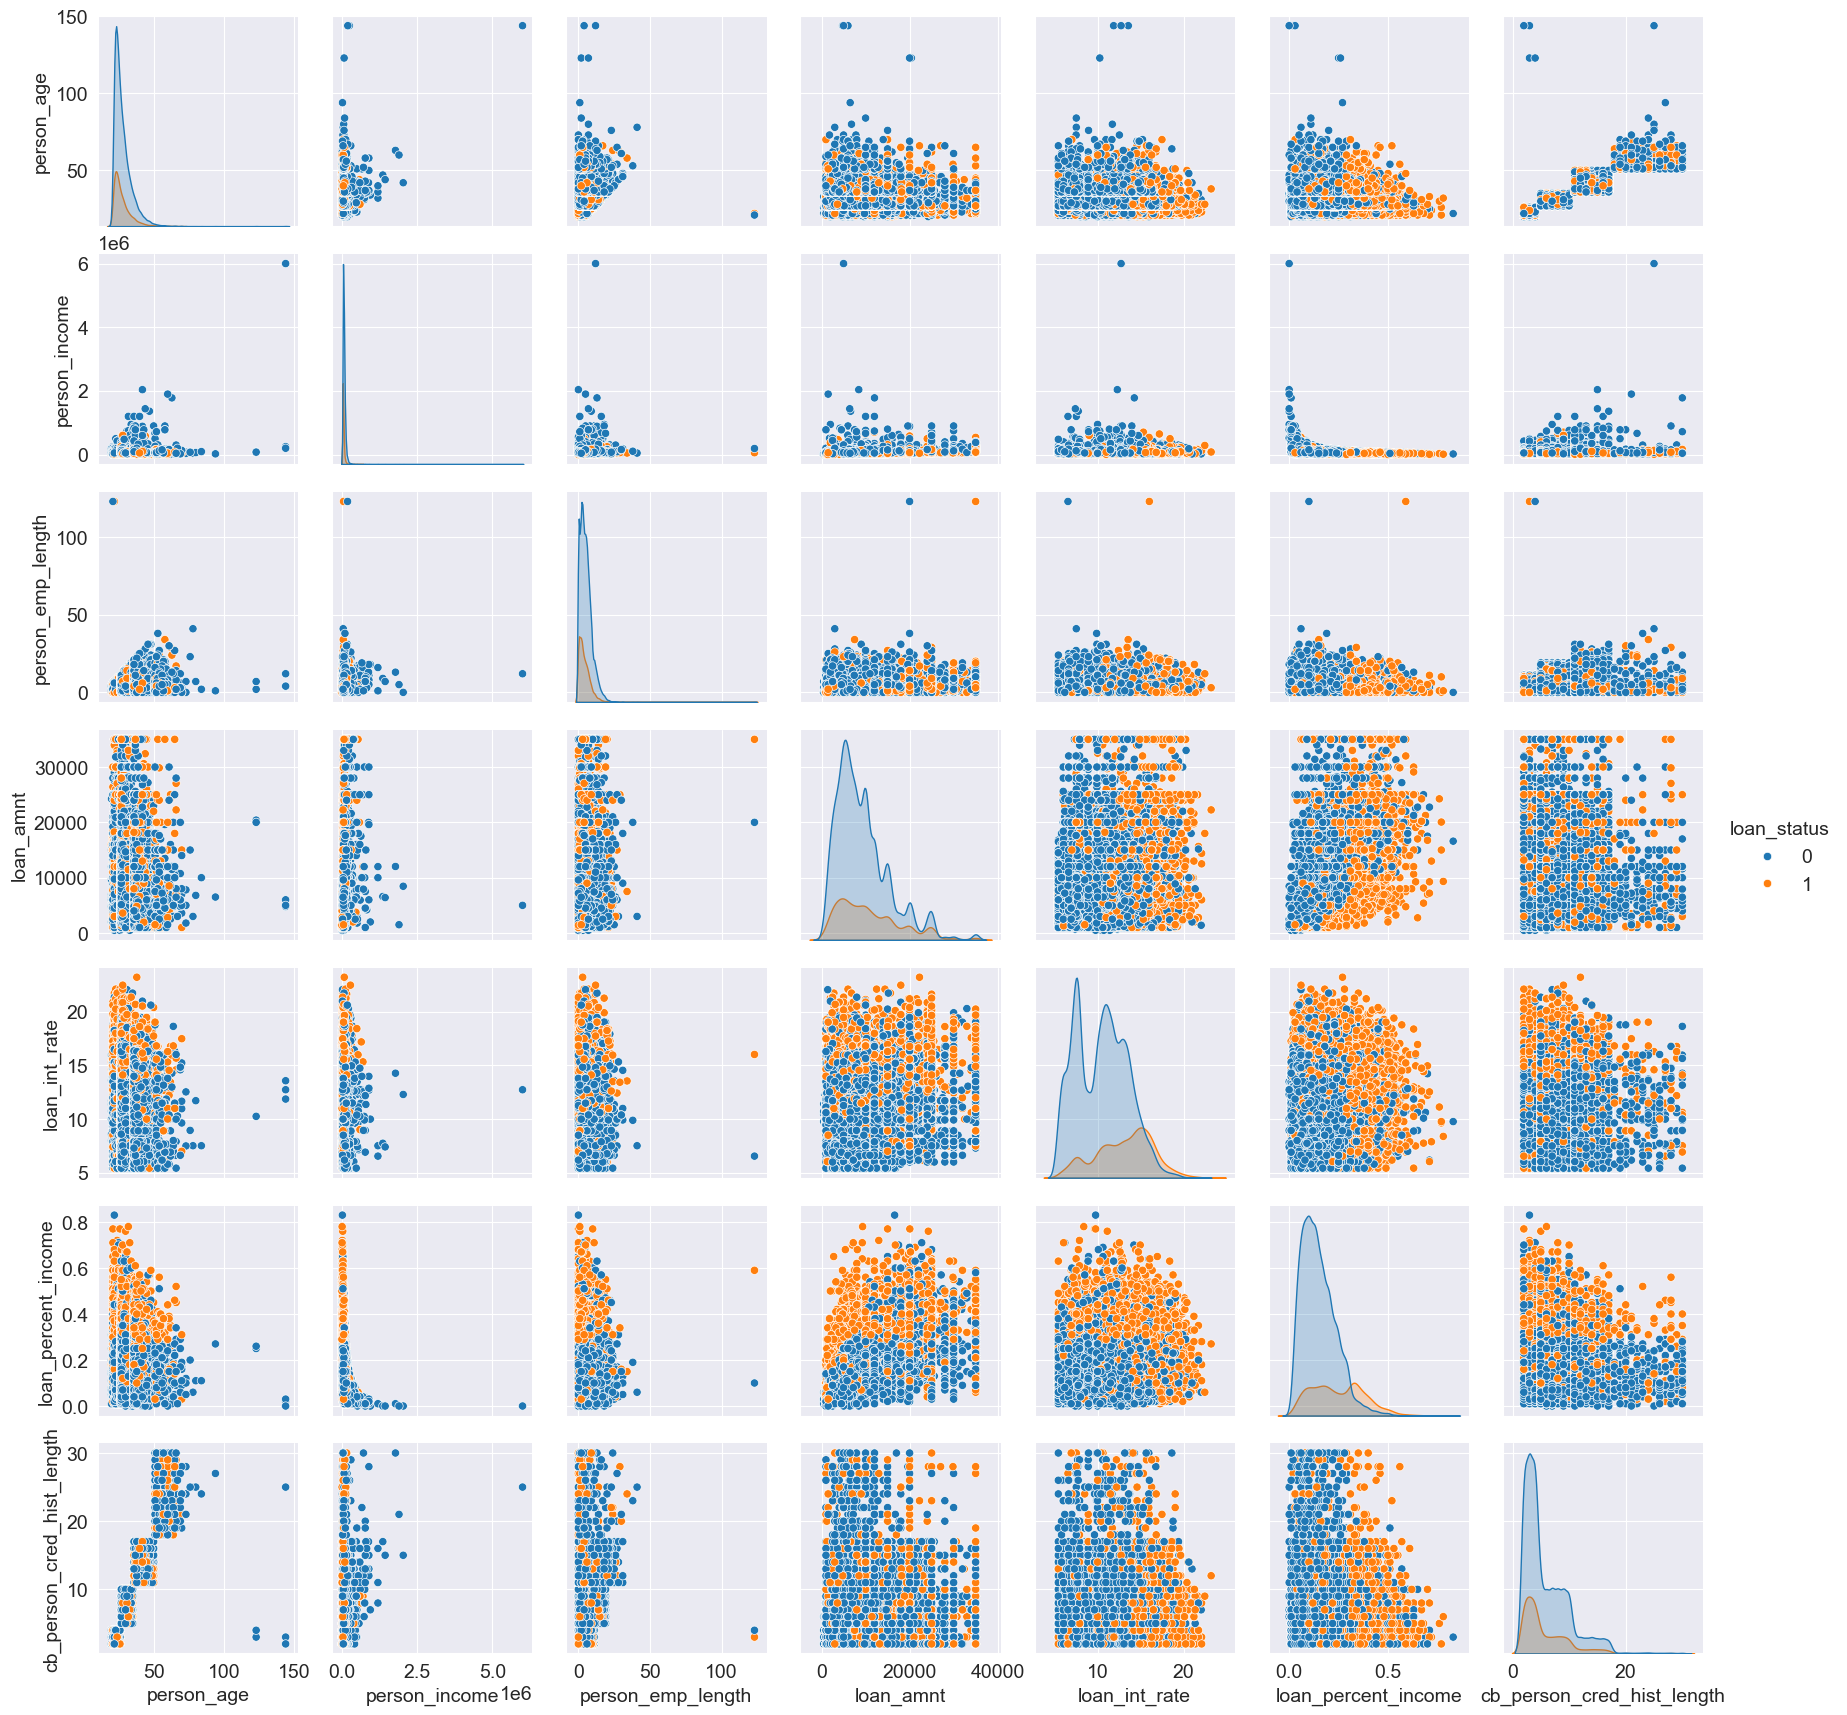

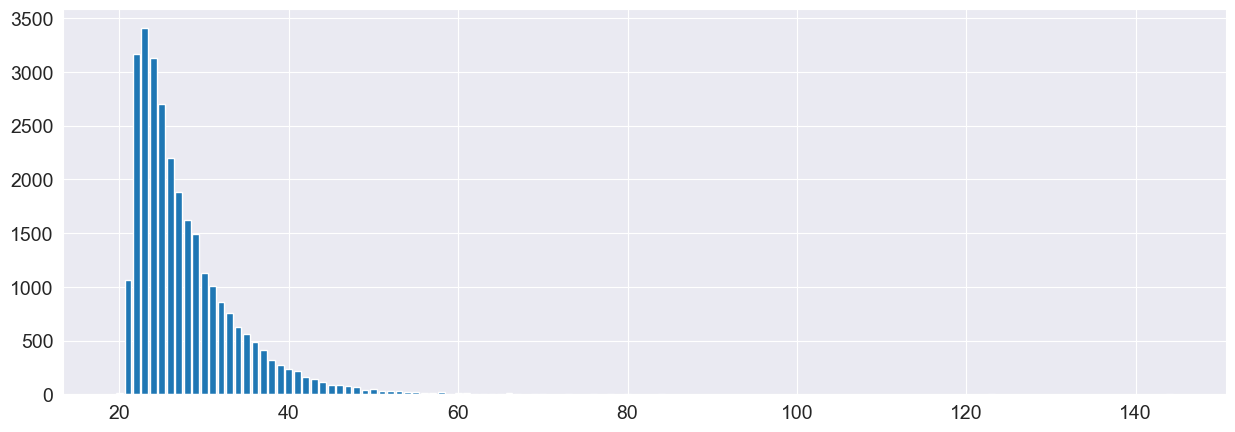

In [204]:
import matplotlib.pyplot as plt 
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
plt.show()
# after 80 it is rare

In [252]:
(data['person_age'].value_counts().values>90).sum()
# dropping rows that have age greater than 90

25

# <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">5. Feature Engineering</div>

In [255]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)
#dropping age above 80

In [257]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [280]:
data['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True, categories_dtype=object)

In [282]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.000800,0.002856


## **Income Group**

In [285]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [287]:
data['income_group']

0                low
1                low
2             middle
3             middle
4                low
            ...     
28626         middle
28627           high
28628    high-middle
28629           high
28630     low-middle
Name: income_group, Length: 28631, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

In [289]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.000800,0.002856


## **Loan Amount**

In [292]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [294]:
data['loan_amount_group']

0             small
1            medium
2        very large
3        very large
4             small
            ...    
28626        medium
28627    very large
28628    very large
28629         large
28630        medium
Name: loan_amount_group, Length: 28631, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [296]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [300]:
# data = data.drop(['index'], axis=1)
# data.reset_index(inplace = True)
# data = data.drop(['index'], axis=1)

In [302]:
data['person_home_ownership'].value_counts()


person_home_ownership
RENT        14548
MORTGAGE    11797
OWN          2192
OTHER          94
Name: count, dtype: int64

In [304]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.000800,0.002856


In [306]:
# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt']

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [308]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [310]:
raw_data = data.copy()

In [312]:
raw_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.000800,0.002856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28626,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,56-65,middle,medium,0.000172,0.002269
28627,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,46-55,high,very large,0.000227,0.000425
28628,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,56-65,high-middle,very large,0.000086,0.000314
28629,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,46-55,high,large,0.000333,0.000765
